In [66]:
import keras
import numpy as np
import pandas as pd
from keras.datasets import reuters
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM
from keras.layers import Embedding
import matplotlib.pyplot as plt

wordNum = 10000
maxlen = 30
eDim = 256

# eliminate the top 20 most common words because why not
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=wordNum, skip_top=20)


In [67]:
# Preprocess text and label categorizing

x_train = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)
y_train = keras.utils.to_categorical(train_labels, num_classes=46)
y_test = keras.utils.to_categorical(test_labels, num_classes=46)

In [68]:
# Building the model with Embedding layer

model = Sequential()
model.add(Embedding(wordNum, eDim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 30, 256)           2560000   
_________________________________________________________________
flatten_9 (Flatten)          (None, 7680)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                491584    
_________________________________________________________________
dense_22 (Dense)             (None, 46)                2990      
Total params: 3,054,574
Trainable params: 3,054,574
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Training the model

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    shuffle=True)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 12s 2ms/step - loss: 1.9754 - acc: 0.4870 - val_loss: 1.7150 - val_acc: 0.5582
Epoch 2/10
7185/7185 [==============================] - 11s 2ms/step - loss: 1.3498 - acc: 0.6665 - val_loss: 1.5751 - val_acc: 0.6071
Epoch 3/10
7185/7185 [==============================] - 12s 2ms/step - loss: 0.7934 - acc: 0.8216 - val_loss: 1.6035 - val_acc: 0.6149
Epoch 4/10
7185/7185 [==============================] - 12s 2ms/step - loss: 0.3997 - acc: 0.9182 - val_loss: 1.7449 - val_acc: 0.5993
Epoch 5/10
7185/7185 [==============================] - 12s 2ms/step - loss: 0.2229 - acc: 0.9528 - val_loss: 1.8838 - val_acc: 0.6016
Epoch 6/10
7185/7185 [==============================] - 13s 2ms/step - loss: 0.1714 - acc: 0.9595 - val_loss: 1.9887 - val_acc: 0.5899
Epoch 7/10
7185/7185 [==============================] - 12s 2ms/step - loss: 0.1531 - acc: 0.9581 - val_loss: 2.0008 - val_acc: 0.6021
Epoch 8

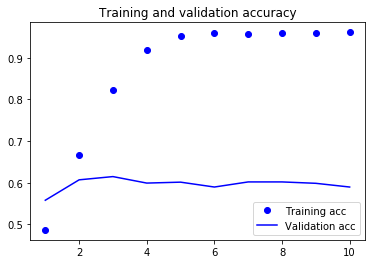

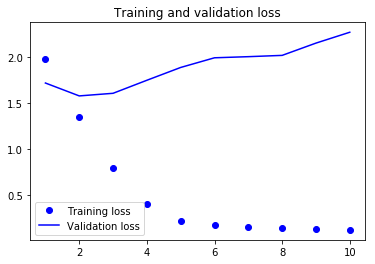

In [70]:
# Validation and evaluation

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [71]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 110us/step


[2.2854518697183259, 0.59082813891362418]

Overfits a lot...
60% accuracy

# Add RNN

In [74]:
# Model with LSTM

model2 = Sequential()
model2.add(Embedding(wordNum, eDim, input_length=maxlen))
model2.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2,))
model2.add(Dense(46, activation = 'softmax'))

model2.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 30, 256)           2560000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense_23 (Dense)             (None, 46)                2990      
Total params: 2,645,166
Trainable params: 2,645,166
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Training the model

# Twice as many epochs because of the dropouts
h = model2.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    shuffle=True)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 17s 2ms/step - loss: 2.1759 - acc: 0.4148 - val_loss: 1.8659 - val_acc: 0.4741
Epoch 2/20
7185/7185 [==============================] - 15s 2ms/step - loss: 1.7807 - acc: 0.5222 - val_loss: 1.7574 - val_acc: 0.5270
Epoch 3/20
7185/7185 [==============================] - 15s 2ms/step - loss: 1.5770 - acc: 0.5801 - val_loss: 1.6500 - val_acc: 0.5732
Epoch 4/20
7185/7185 [==============================] - 15s 2ms/step - loss: 1.3943 - acc: 0.6267 - val_loss: 1.5611 - val_acc: 0.6055
Epoch 5/20
7185/7185 [==============================] - 15s 2ms/step - loss: 1.2354 - acc: 0.6745 - val_loss: 1.5198 - val_acc: 0.6227
Epoch 6/20
7185/7185 [==============================] - 15s 2ms/step - loss: 1.0988 - acc: 0.7091 - val_loss: 1.5537 - val_acc: 0.6327
Epoch 7/20
7185/7185 [==============================] - 15s 2ms/step - loss: 0.9765 - acc: 0.7431 - val_loss: 1.5031 - val_acc: 0.6361
Epoch 8

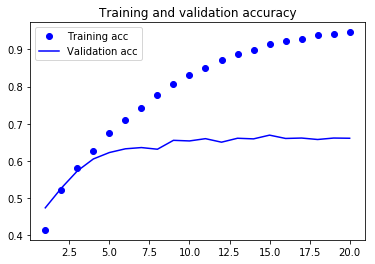

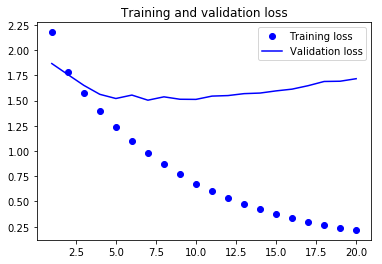

In [76]:
# Validation and evaluation

acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [77]:
model2.evaluate(x_test, y_test)

2246/2246 [==============================] - 1s 242us/step


[1.8622956713288359, 0.63312555657150693]

I got 13% better results with recurrent network. Also adding dropouts helped little bit with the overfitting issue.
Recurrent networks seemed to work better in this kind of problem compared to dense network.